In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [234]:
phones = pd.read_csv('train.csv')
phones

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,0.333333
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,0.666667
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,0.666667
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,0.666667
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,...,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,0.000000
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,...,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,0.666667
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,...,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,1.000000
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,...,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,0.000000


In [235]:
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
X = phones[features].to_numpy()
X

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [236]:
import sklearn.cluster as cluster

In [237]:
k_values = []
inertias = []
for k in range(1, 10):
    model = cluster.KMeans(n_clusters=k, n_init=200)
    model.fit(X)
    k_values.append(k)
    inertias.append(model.inertia_)

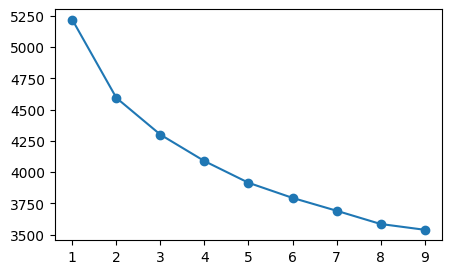

In [238]:
fig, ax = plt.subplots(1,1,figsize=(5,3));

ax.plot(k_values, inertias, marker='o');

plt.show();

In [239]:
k=4
model = cluster.KMeans(n_clusters=k, n_init=200)
model.fit(X)

KMeans(n_clusters=4, n_init=200)

In [240]:
model.cluster_centers_

array([[ 4.82398130e-01,  5.05769231e-01,  3.98692308e-01,
         5.26923077e-01,  2.34716599e-01,  1.00000000e+00,
         4.98635236e-01,  4.43803419e-01,  4.98814103e-01,
         4.95329670e-01,  5.03365385e-01,  3.37221350e-01,
         5.17083034e-01,  5.17982979e-01,  5.33928571e-01,
         3.38141026e-01,  4.68696581e-01,  1.00000000e+00,
         5.13461538e-01,  1.00000000e+00],
       [ 5.11653006e-01,  4.97131931e-01,  3.92198853e-01,
         4.95219885e-01,  2.11733924e-01,  1.00000000e+00,
         4.75544316e-01,  4.47843637e-01,  4.96000637e-01,
         4.91942092e-01,  4.85086042e-01,  3.12780466e-01,
         4.90467851e-01,  4.84683705e-01,  5.25539470e-01,
         3.19842787e-01,  5.05311239e-01,  1.00000000e+00,
         5.08604207e-01, -3.33066907e-16],
       [ 5.03127597e-01,  1.00000000e+00,  4.30064240e-01,
         5.33190578e-01,  2.31488786e-01,  1.11022302e-16,
         4.90018650e-01,  4.51106353e-01,  5.14311206e-01,
         5.34720098e-01,  4.9

In [241]:
# calculate the differences between each pair of cluster centers
center_diffs = []
for i in range(k):
    for j in range(i+1, k):
        center_diff = np.abs(model.cluster_centers_[i] - model.cluster_centers_[j])
        center_diffs.append(center_diff)

# calculate the mean difference between cluster centers for each feature
mean_diff = np.mean(center_diffs, axis=0)

# sort the feature indices based on the mean difference between the centers
sorted_idx = np.argsort(mean_diff)[::-1]

# print the features sorted by importance in differentiating the clusters
df = pd.DataFrame({'Feature': [features[i] for i in sorted_idx],
                   'Importance': mean_diff[sorted_idx]})
print(df)

          Feature  Importance
0          four_g    0.666667
1            wifi    0.509106
2            blue    0.501440
3         three_g    0.344146
4        dual_sim    0.030042
5       talk_time    0.026508
6   battery_power    0.022622
7        px_width    0.022253
8     clock_speed    0.022049
9         n_cores    0.021874
10           sc_w    0.017243
11            ram    0.017007
12           sc_h    0.015663
13     int_memory    0.014584
14   touch_screen    0.014109
15      px_height    0.012981
16             fc    0.011727
17      mobile_wt    0.009412
18             pc    0.009263
19          m_dep    0.004685


In [242]:
# assuming you already have the 'model' object with trained KMeans algorithm

# get the labels assigned to each data point
labels = model.labels_

# count the number of occurrences of each label
cluster_sizes = {}
for label in labels:
    if label in cluster_sizes:
        cluster_sizes[label] += 1
    else:
        cluster_sizes[label] = 1

# print the sizes of each cluster
for label, size in cluster_sizes.items():
    print(f"Cluster {label}: {size} data points")
    
phones['price_range'].value_counts()

Cluster 3: 490 data points
Cluster 1: 523 data points
Cluster 2: 467 data points
Cluster 0: 520 data points


0.333333    500
0.666667    500
1.000000    500
0.000000    500
Name: price_range, dtype: int64

In [243]:
cluster_centers = model.cluster_centers_
df = pd.DataFrame(cluster_centers, columns=features)
df = df.T
df.columns = ['Cluster ' + str(i) for i in range(k)]
df.index.name = 'Feature'
df

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Feature,,,,
battery_power,0.482398,5.116530e-01,5.031276e-01,4.733194e-01
blue,0.505769,4.971319e-01,1.000000e+00,-1.665335e-16
clock_speed,0.398692,3.921989e-01,4.300642e-01,4.173878e-01
dual_sim,0.526923,4.952199e-01,5.331906e-01,4.836735e-01
fc,0.234717,2.117339e-01,2.314888e-01,2.300752e-01
four_g,1.000000,1.000000e+00,1.110223e-16,0.000000e+00
int_memory,0.498635,4.755443e-01,4.900187e-01,4.742923e-01
m_dep,0.443803,4.478436e-01,4.511064e-01,4.430839e-01
mobile_wt,0.498814,4.960006e-01,5.143112e-01,5.003571e-01


In [244]:
# Assume that X is your input data, and model is your KMeans model
# First, use the predict method to get the cluster assignments for each data point
labels = model.predict(X)

# Next, calculate the distance between each data point and its corresponding cluster center
distances = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    distances[i] = np.linalg.norm(X[i] - model.cluster_centers_[labels[i]])

# Finally, calculate the average distance for each cluster, which can serve as a proxy for cluster density
cluster_densities = np.zeros(model.cluster_centers_.shape[0])
for i in range(model.cluster_centers_.shape[0]):
    cluster_densities[i] = np.mean(distances[labels == i])

# The resulting cluster_densities array will contain the density for each cluster
cluster_densities

array([1.38568809, 1.38261477, 1.46956474, 1.46744812])

In [248]:
phones['cluster'] = model.predict(X)
counts = phones.groupby(['price_range', 'cluster']).size().unstack(fill_value=0)
counts

cluster,0,1,2,3
price_range,,,,
0.000000,117,142,121,120
0.333333,135,127,109,129
0.666667,122,125,126,127
1.000000,146,129,111,114
